In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np

(120, 160, 3)


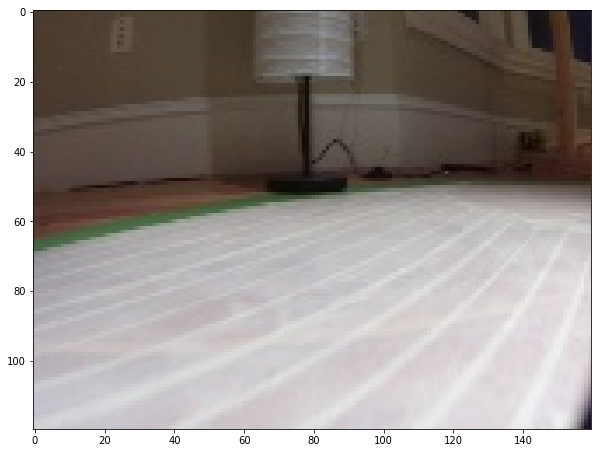

In [9]:
images = []
for file in sorted(os.listdir('data/')):
    if '.jpg' in file:
        im = cv2.cvtColor(cv2.imread('data/' + file), cv2.COLOR_BGR2RGB)
        images.append(im)
    

plt.figure(figsize=(10,10))
im = images[100]
print(np.shape(im))
#plt.imshow(im[50:54,135:140,:])

plt.imshow(im)
plt.show()

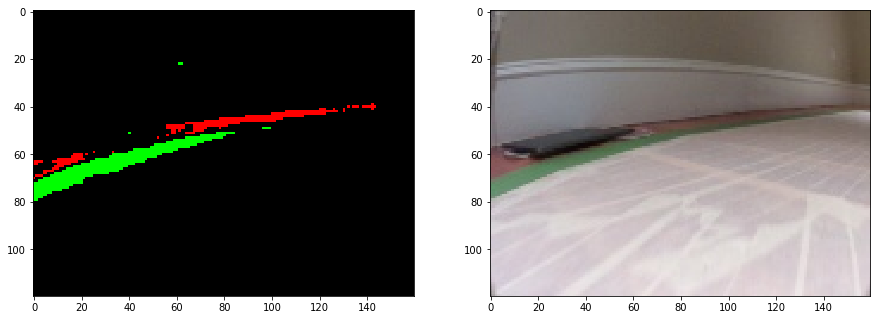

In [4]:
lower_green = np.array([40,10,60])
upper_green = np.array([100,255,255])

lower_brown = np.array([0,50,30])
upper_brown = np.array([7,170,256])

frame = images[400]
hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_brown = cv2.inRange(hsv, lower_brown, upper_brown)
mask_green = np.stack((mask_green,)*3, axis=-1)
mask_green[:,:,0] = np.zeros(np.shape(mask_green[:,:,0]))
mask_green[:,:,2] = np.zeros(np.shape(mask_green[:,:,0]))
mask_brown = np.stack((mask_brown,)*3, axis=-1)
mask_brown[:,:,1] = np.zeros(np.shape(mask_brown[:,:,0]))
mask_brown[:,:,2] = np.zeros(np.shape(mask_brown[:,:,0]))

mask = mask_green + mask_brown
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(mask, vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(frame, vmin=0, vmax=255)
plt.show()

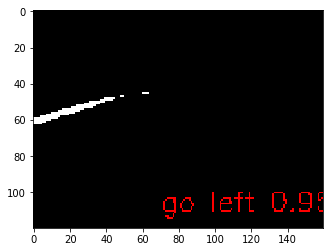

go left 0.950151146706


In [7]:
def steering(img):
    # takes image and returns a steering "angle" where stearing angle is between [-1,1]
    # negative numbers means go right
    # positive numbers 
    lower_green = np.array([40,10,60])
    upper_green = np.array([100,255,255])

    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv, lower_green, upper_green)
    #mask = mask1 + mask2
    h, w = np.shape(mask)

    # look for white pixel in first and last 20 columms 
    row_left, _ = np.where(mask[:,:w//2]>=255)
    row_right, _ = np.where(mask[:,-w//2:]>=255)

    # Robust choice for pixels
    if len(row_left) < 10:
        left_most = 0
        right_most = np.median(row_right)
    elif len(row_right) < 10:
        right_most = 0
        left_most = np.median(row_left)
    else:
        left_most = np.median(row_left)
        right_most = np.median(row_right)

    turn = (-2 / (1 + np.exp((left_most - right_most)/15)))+1
    if (np.isnan(turn)):
        turn = 0.0

    return turn


lower_green = np.array([40,10,60])
upper_green = np.array([100,255,255])
i = 300
frame = images[i]
hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv, lower_green, upper_green)
mask3 = np.stack((mask,)*3, axis=-1)

turn = steering(images[i])
text = "go right " + str(turn) if turn <= 0 else "go left " + str(turn)

font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,110) if turn <= 0 else (70,110)
fontScale              = 0.5
fontColor              = (0,255,0) if turn <= 0 else (255,0,0)
lineType               = 1 

cv2.putText(mask3,text, 
    bottomLeftCornerOfText, 
    font, 
    fontScale,
    fontColor,
    lineType)

plt.imshow(mask3, vmin=0, vmax=255)
plt.show()
print(text)

In [35]:
def treshold_green(img):

    
    threshold = 30
    r = abs(img[:,:,0] - GREEN[0]) < threshold
    g = abs(img[:,:,1] - GREEN[1]) < threshold
    b = abs(img[:,:,2] - GREEN[2]) < threshold
    im  = np.stack((r,g,b), axis=2)
    #im = np.reshape(np.array([r,g,b]),(120,160,3))
    im[np.sum(im, axis=2) < 3] = 0
    im[np.sum(im, axis=2) == 3] = 1
    im =np.asarray(im,dtype=np.uint8) * 255

    return im

plt.figure(figsize=(10,20))
for i in range(1,9,2):
    tmp = treshold_green(np.asarray(images[i-1],dtype=np.float).copy())
    plt.subplot(4,2,i)
    plt.imshow(tmp,vmin=0,vmax=255)
    plt.subplot(4,2,i+1)
    plt.imshow(images[i-1],vmin=0,vmax=255)
    
plt.show()

NameError: name 'GREEN' is not defined

<Figure size 720x1440 with 0 Axes>

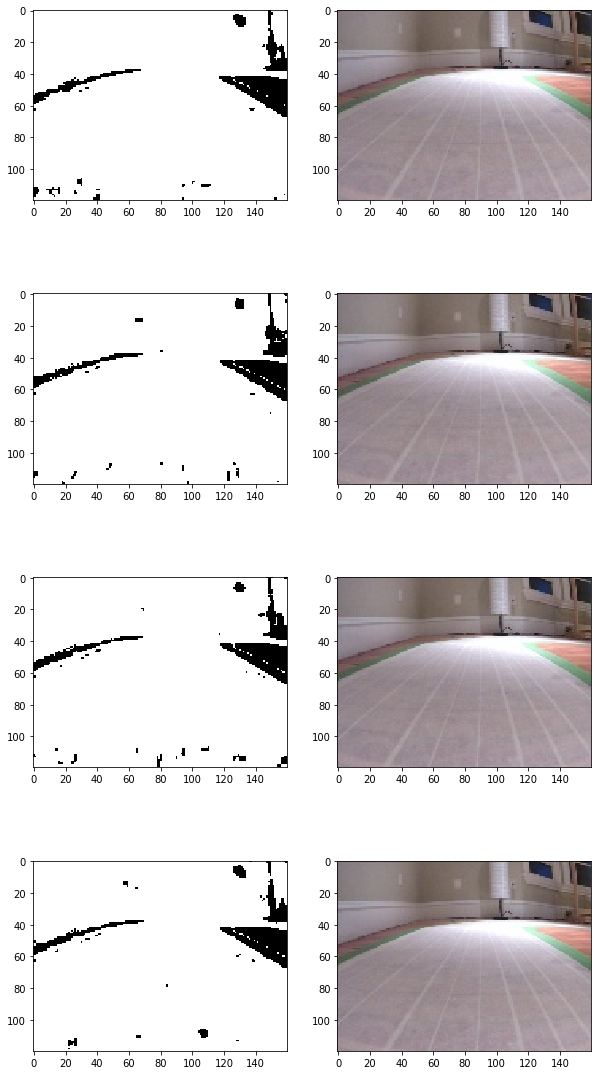

In [90]:
def threshold_image(img, val):
    
    im = np.zeros(np.shape(img))
    im = cv2.normalize(img,  im, 0, 255, cv2.NORM_MINMAX)
    tmp = abs(im[:,:,0]-im[:,:,1]) + abs(im[:,:,1]-im[:,:,2])
    im[tmp > val] = 0

    im[tmp <= val] = 255
    return np.asarray(im,dtype=np.uint8)


plt.figure(figsize=(10,20))
for i in range(1,9,2):

    tmp = threshold_image(np.asarray(images[i-1],dtype=np.float).copy(), 30)
    plt.subplot(4,2,i)
    plt.imshow(tmp,vmin=0,vmax=255)
    plt.subplot(4,2,i+1)
    plt.imshow(images[i-1],vmin=0,vmax=255)
    
plt.show()



In [174]:
video_name = 'video_hsv_green_brown3.avi'

height, width, layers = np.shape(images[0])

video = cv2.VideoWriter(video_name, -1,10, (width*2,height))

for image in images:
    """
    turn = steering(images[i])
    text = "go left " + str(turn) if turn <= 0 else "go right " + str(turn)

    font                   = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (10,110) #if turn <= 0 else (70,110)
    fontScale              = 0.5
    fontColor              = (0,255,0) if turn <= 0 else (255,0,0)
    lineType               = 1 
    """
    # New method!
    frame = image
    lower_green = np.array([40,10,60])
    upper_green = np.array([100,255,255])

    lower_brown = np.array([0,50,30])
    upper_brown = np.array([7,170,256])

    hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    mask_brown = cv2.inRange(hsv, lower_brown, upper_brown)
    mask_green = np.stack((mask_green,)*3, axis=-1)
    mask_green[:,:,0] = np.zeros(np.shape(mask_green[:,:,0]))
    mask_green[:,:,2] = np.zeros(np.shape(mask_green[:,:,0]))
    mask_brown = np.stack((mask_brown,)*3, axis=-1)
    mask_brown[:,:,1] = np.zeros(np.shape(mask_brown[:,:,0]))
    mask_brown[:,:,2] = np.zeros(np.shape(mask_brown[:,:,0]))

    mask = mask_green + mask_brown
    #plt.imshow(mask, vmin=0, vmax=255)
    """
    cv2.putText(mask3,text, 
        bottomLeftCornerOfText, 
        font, 
        fontScale,
        fontColor,
        lineType)
    """
    cmb = np.concatenate((mask, image), axis = 1)

    video.write(cmb)

cv2.destroyAllWindows()
video.release()